In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from FRVRS import nu
import matplotlib.pyplot as plt
import re


# OSU dataset of Simulation Sessions, deidentified

Doug screened all of the **VOICE_COMMAND** and **VOICE_CAPTURE** lines and replaced any names with either Max or Jane, regardless of whether the name was that of the responder.

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    display(df.T)

(149166, 100)


,54633,46487,71695,15828
action_type,TOOL_HOVER,TOOL_SELECTED,TOOL_HOVER,TOOL_HOVER
action_tick,178271,601948,173240,3385214
event_time,2023-05-11 11:24:00,2023-03-03 12:02:00,2023-05-11 08:47:00,2023-05-16 17:11:00
session_uuid,1e7d274d-f393-4888-9f28-4de53b0260e3,30a49dd8-c08a-4994-a622-57647670b5bb,7994d633-9b4d-475e-8e49-51cb6e4fea4b,724fdf45-3165-43b8-b9ca-dc07102d2886
file_name,1e7d274d-f393-4888-9f28-4de53b0260e3,Marty6,7994d633-9b4d-475e-8e49-51cb6e4fea4b,724fdf45-3165-43b8-b9ca-dc07102d2886
tool_hover_type,Gauze,NaN,Gauze,Hemostatic Gauze
tool_hover_count,999,NaN,999,1004
tool_selected_type,NaN,Hemostatic Gauze,NaN,NaN
tool_selected_count,NaN,998,NaN,NaN
scene_id,0,0,0,2



## Decision Points

<p>
    OSU and Big Bear: With the IRB approval (for the previous OSU dataset) in place, I would like to get working on the dataset asap. That means:
    <ul>
        <li>Getting it deidentified and sharable</li>
        <li>If there is general demographic information like gender or level of expertise that can be associated with the VR performance, that would be useful.</li>
        <li>Big Bear: once it is available to you, I want an exploratory analysis on decision points such that I can see the variance in responses to the same situation.</li>
        <li>For example, if there are 3 waving patients and the participant chooses to move toward one and assess them, I want to know the sim state (visual info. on each patient, distance, etc.) and then a breakdown of how many participants chose to move toward each patient.</li>
        <li>Similar for treatment options, for each patient present in the simulated environment, what is the variance in which treatment is applied</li>
         <li>Does it depend on ordr?</li>
          <li>Ting?</li>
           <li>Be creative and ask all the questions. The goal is to provide TA1 with this dataset if there is anything useful to be found in analyzing the decisions (not necessarily that we find results but that the data is in shape to ask these questions). Let me know if you need additional clarifiion   </l    i>
</</p>
ion.

In [4]:

# List the action types
frvrs_logs_df.action_type.value_counts().sort_index()

action_type
BAG_ACCESS              2180
BAG_CLOSED              2149
INJURY_RECORD           3052
INJURY_TREATED          1577
PATIENT_DEMOTED         1818
PATIENT_ENGAGED         2295
PATIENT_RECORD          2063
PULSE_TAKEN             3427
SESSION_END              256
SESSION_START            266
S_A_L_T_WALKED          2725
S_A_L_T_WALK_IF_CAN     4567
S_A_L_T_WAVED           1761
S_A_L_T_WAVE_IF_CAN     2147
TAG_APPLIED             1819
TAG_DISCARDED            533
TAG_SELECTED            2353
TELEPORT                5678
TOOL_APPLIED            1818
TOOL_DISCARDED          1655
TOOL_HOVER             89733
TOOL_SELECTED           2263
VOICE_CAPTURE          10115
VOICE_COMMAND           2916
Name: count, dtype: int64


These action types mean that the DM has made a decision: INJURY_TREATED, PATIENT_ENGAGED, PULSE_TAKEN, TAG_APPLIED, and TOOL_APPLIED.


## Location Points

In [6]:

mask_series = frvrs_logs_df.location_id.isnull()
frvrs_logs_df[~mask_series].sample(5).dropna(axis='columns', how='all').T

,128859,20561,58993,19738,39446
action_type,S_A_L_T_WAVE_IF_CAN,BAG_CLOSED,PATIENT_RECORD,PATIENT_DEMOTED,INJURY_RECORD
action_tick,254121,5398846,19132,4785293,11991
event_time,2023-05-09 10:03:00,2023-05-16 17:45:00,2023-06-23 10:52:00,2023-05-16 17:34:00,2023-03-08 10:09:00
session_uuid,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,724fdf45-3165-43b8-b9ca-dc07102d2886,2dd0d21c-1633-47de-848a-317df7ea3180,724fdf45-3165-43b8-b9ca-dc07102d2886,b52e71ec-050f-49e1-b495-7c36f5537544
file_name,ff97fc56-c803-4aa7-b419-35e0ac17d0b3,724fdf45-3165-43b8-b9ca-dc07102d2886,2dd0d21c-1633-47de-848a-317df7ea3180,724fdf45-3165-43b8-b9ca-dc07102d2886,Marty23
patient_demoted_health_level,NaN,NaN,NaN,100,NaN
patient_demoted_health_time_remaining,NaN,NaN,NaN,Infinity,NaN
patient_demoted_id,NaN,NaN,NaN,Mike_2 Root,NaN
patient_demoted_position,NaN,NaN,NaN,"(2.6, 0.0, 2.4)",NaN
patient_demoted_rotation,NaN,NaN,NaN,"(0.0, 0.7, 0.0, -0.7)",NaN


In [7]:

# Get the list of columns that have 3D coordinates as values in them
location_regex = re.compile(r'\((-?\d\.\d, ){2}-?\d\.\d\)')
srs = frvrs_logs_df.applymap(lambda x: bool(location_regex.fullmatch(str(x))), na_action='ignore').sum()
mask_series = (srs != 0)
location_columns_list = srs[mask_series].index.tolist()
location_columns_list

['teleport_location', 'patient_demoted_position', 'patient_record_position', 'injury_record_injury_injury_locator', 's_a_l_t_walk_if_can_sort_location', 's_a_l_t_walked_sort_location', 's_a_l_t_wave_if_can_sort_location', 's_a_l_t_waved_sort_location', 'patient_engaged_position', 'bag_access_location', 'injury_treated_injury_injury_locator', 'bag_closed_location', 'tag_discarded_location', 'tool_discarded_location', 'location_id']

In [8]:

# Get the session with the most scenes
random_session_uuid = frvrs_logs_df.groupby(fu.scene_groupby_columns).count().sort_index(level=1).tail(1).index.get_level_values(0)[0]
random_time_group = 0

In [38]:

# Get the session with the most teleports
mask_series = (frvrs_logs_df.action_type == 'TELEPORT')
teleports_session_uuid, teleports_time_group = frvrs_logs_df[mask_series].groupby(fu.scene_groupby_columns).size().sort_values().tail(1).index[0]
base_mask_series = (frvrs_logs_df.session_uuid == teleports_session_uuid) & (frvrs_logs_df.scene_id == teleports_time_group)

In [32]:

# Get a teleport distance relative to zero
mask_series = (frvrs_logs_df.action_type == 'TELEPORT') & base_mask_series
teleports_df = frvrs_logs_df[mask_series].sort_values(['event_time', 'action_tick']).dropna(axis='columns', how='all')
# display(teleports_df.sample(5).dropna(axis='columns', how='all'))
teleports_df['teleport_distance'] = teleports_df.teleport_location.map(lambda x: nu.get_euclidean_distance(x))
display(teleports_df.sample(5).T)

,2044,600,939,1297,1805
action_type,TELEPORT,TELEPORT,TELEPORT,TELEPORT,TELEPORT
action_tick,1425485,436574,645408,1022018,1324161
event_time,2023-05-16 15:22:00,2023-05-16 15:06:00,2023-05-16 15:09:00,2023-05-16 15:16:00,2023-05-16 15:21:00
session_uuid,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270
file_name,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270,06574b6f-ab02-432c-9a65-7b031218a270
teleport_location,"(-1.1, 0.0, 3.8)","(1.6, 0.0, 1.9)","(3.9, 0.0, 3.3)","(0.7, 0.0, -2.3)","(-0.6, 0.0, 4.6)"
scene_id,0,0,0,0,0
location_id,"(-1.1, 0.0, 3.8)","(1.6, 0.0, 1.9)","(3.9, 0.0, 3.3)","(0.7, 0.0, -2.3)","(-0.6, 0.0, 4.6)"
new_teleport_location,NaN,NaN,NaN,NaN,NaN
teleport_distance,3.956008,2.483948,5.108816,2.404163,4.638965



The y-value of the *teleport_location* field after patient engagement is not predictive of kneel vs stand because the *teleport_location* always has a y-value of zero.

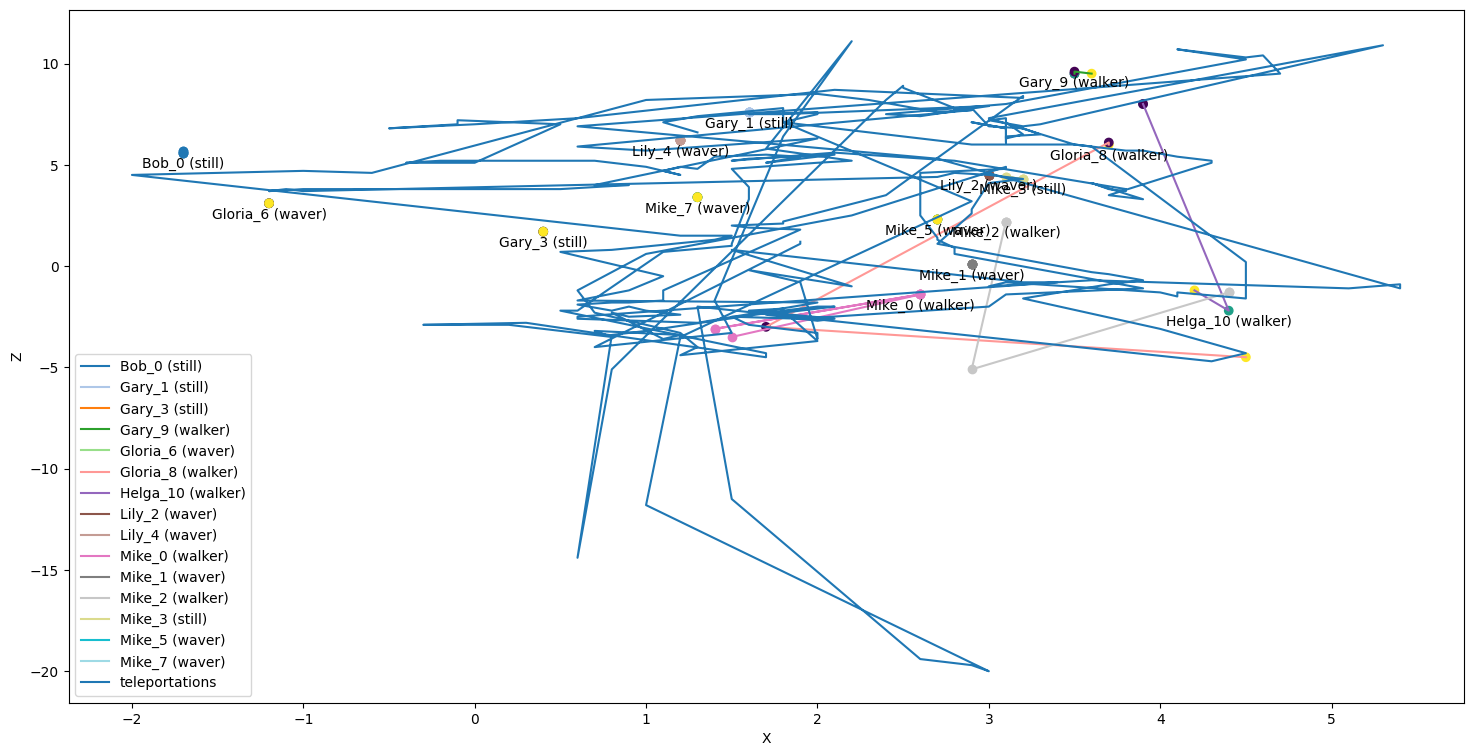

In [37]:

ax = plt.figure(figsize=(18, 9)).add_subplot()

# Show the positions of patients recorded and engaged at our scene and session UUID
color_cycler = nu.get_color_cycler(frvrs_logs_df[base_mask_series].groupby('patient_id').size().shape[0])
location_cns_list = ['patient_record_position', 'patient_engaged_position']
for ((session_uuid, patient_id), patient_df), face_color_dict in zip(frvrs_logs_df[base_mask_series].sort_values([
    'event_time', 'action_tick'
]).groupby(['session_uuid', 'patient_id']), color_cycler()):
    x = []; y = []; z = []
    for location_cn in location_cns_list:
        mask_series = patient_df[location_cn].isnull()
        srs = patient_df[~mask_series][location_cn].map(lambda x: eval(x))
        x.extend(srs.map(lambda x: x[0]).values)
        y.extend(srs.map(lambda x: x[1]).values)
        z.extend(srs.map(lambda x: x[2]).values)
    face_color = face_color_dict['color']
    label = patient_id.replace(' Root', ' (') + patient_df.patient_engaged_sort.dropna().tolist()[-1] + ')'
    ax.plot(x, z, c=face_color, alpha=1.0, label=label)
    ax.scatter(x, z, c=face_color, alpha=1.0)
    coords_set = set()
    for x, z in zip(x, z):
        coords_tuple = (x, z)
        coords_set.add(coords_tuple)
    for coords_tuple in coords_set:
        x, y = coords_tuple
        plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, -8), ha='center', va='center')
        break

# Visualize non-cumulative teleportations
x = []; z = []
for teleport_location in teleports_df.teleport_location:
    teleport_location = eval(teleport_location)
    x.append(teleport_location[0])
    z.append(teleport_location[2])
ax.plot(x, z, alpha=1.0, label='teleportations');

# Add legend and labels
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Z');

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


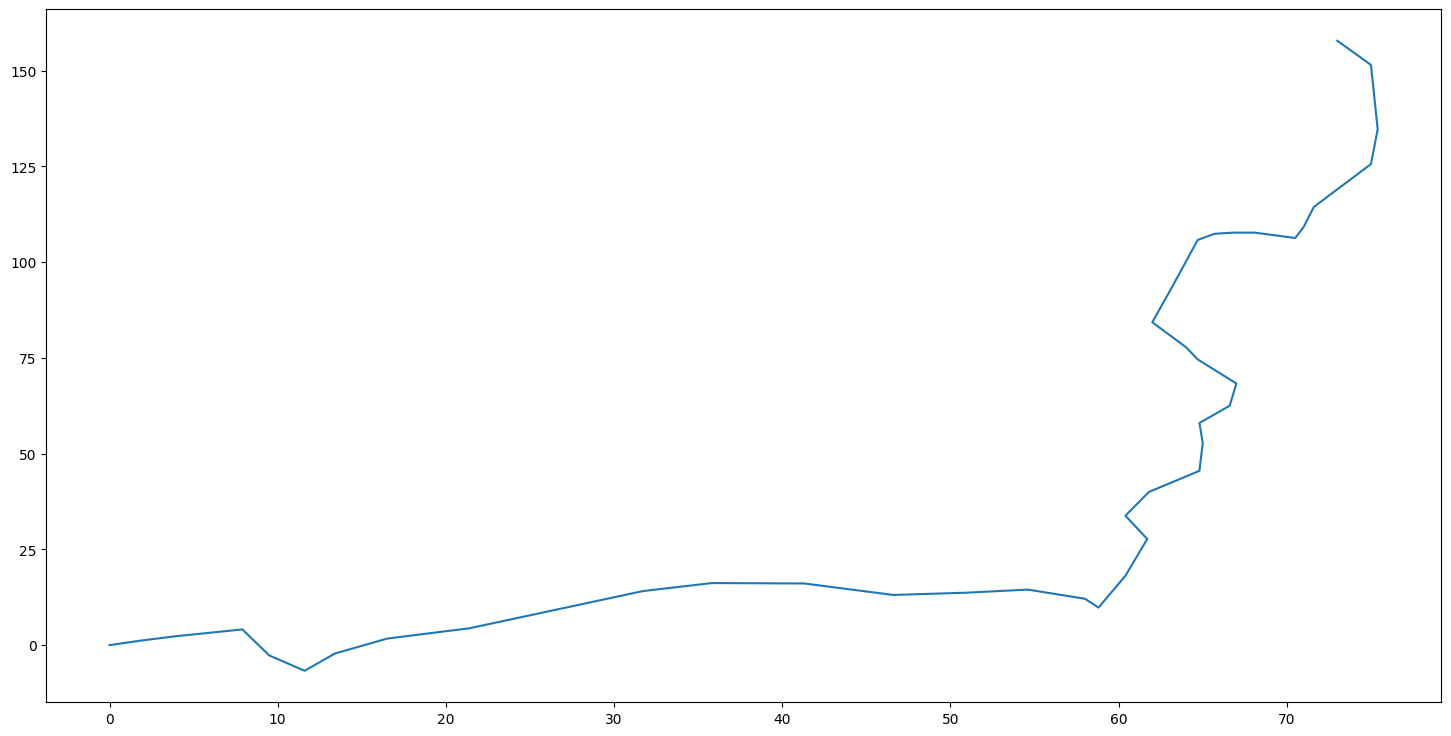

In [22]:

# Visualize cumulative teleportations
ax = plt.figure(figsize=(18, 9)).add_subplot()#projection='3d')
x = [0.0]; y = [0.0]; z = [0.0]
old_teleport_location = (x[0], y[0], z[0])
for row_index, row_series in df.iterrows():
    teleport_location = row_series.teleport_location
    new_teleport_location = nu.get_absolute_position(teleport_location, first_point=str(old_teleport_location))
    df.loc[row_index, 'new_teleport_location'] = str(new_teleport_location)
    old_teleport_location = new_teleport_location
    x.append(new_teleport_location[0])
    y.append(new_teleport_location[1])
    z.append(new_teleport_location[2])
print(y)
ax.plot(x, y, z, alpha=1.0);

In [15]:

# Add a new teleport location column to the main dataset
frvrs_logs_df = nu.load_object('frvrs_logs_df')
for session_uuid, session_df in frvrs_logs_df.sort_values(['event_time', 'action_tick']).groupby('session_uuid'):
    old_teleport_location = (0.0, 0.0, 0.0)
    mask_series = (session_df.action_type == 'TELEPORT')
    for row_indexes_list in nu.split_row_indices_list(session_df[mask_series].index, teleport_indexes_list):
        mask_series = session_df.index.isin(row_indexes_list)
        df1 = session_df[mask_series]
        # print(df1.index[0]); display(df1.dropna(axis='columns', how='all')); raise
        teleport_location = df1.iloc[0].teleport_location
        if (pd.notnull(teleport_location)):
            row_index = df1.index[0]
            # print(row_index, row_indexes_list, teleport_location); display(frvrs_logs_df.loc[row_index]); raise
            new_teleport_location = nu.get_absolute_position(teleport_location, first_point=str(old_teleport_location))
            frvrs_logs_df.loc[row_index, 'new_teleport_location'] = str(new_teleport_location)
            old_teleport_location = new_teleport_location

In [16]:

# Explore what types of columns we have
columns_list = ['teleport_location', 'new_teleport_location']
df = nu.get_column_descriptions(frvrs_logs_df, columns_list).sort_values('count_uniques')
mask_series = df.column_name.isin(columns_list)
df[mask_series].T

,1,0
column_name,new_teleport_location,teleport_location
dtype,object,object
count_blanks,149025,143488
count_uniques,32,3423
count_zeroes,0,0
has_dates,False,False
min_value,"(-0.1, 0.0, -2.7)","(-0.1, 0.0, -2.7)"
max_value,"(7.9, 0.0, 3.8)","(6.5, 0.0, 2.0)"
only_integers,NaN,NaN


In [17]:

# Explore some examples where the new teleport location is different from the old one
mask_series = ~frvrs_logs_df.new_teleport_location.isnull() & ~frvrs_logs_df.teleport_location.isnull()
mask_series &= (frvrs_logs_df.new_teleport_location != frvrs_logs_df.teleport_location)
columns_list = ['session_uuid', 'action_tick', 'event_time', 'teleport_location', 'new_teleport_location']
frvrs_logs_df[mask_series][columns_list]

,session_uuid,action_tick,event_time,teleport_location,new_teleport_location
50802,04882754-51a0-4e5b-9617-b200e3609116,66309,2023-06-07 10:27:00,"(3.7, 0.0, 5.3)","(4.5, 0.0, 1.9)"
50826,04882754-51a0-4e5b-9617-b200e3609116,100778,2023-06-07 10:27:00,"(3.4, 0.0, 1.9)","(7.9, 0.0, 3.8)"
50855,04882754-51a0-4e5b-9617-b200e3609116,141854,2023-06-07 10:28:00,"(2.6, 0.0, -1.1)","(10.5, 0.0, 2.7)"
50856,04882754-51a0-4e5b-9617-b200e3609116,143393,2023-06-07 10:28:00,"(2.6, 0.0, -1.1)","(13.1, 0.0, 1.6)"
50969,04882754-51a0-4e5b-9617-b200e3609116,227522,2023-06-07 10:29:00,"(0.8, 0.0, -2.3)","(13.9, 0.0, -0.7)"
51237,04882754-51a0-4e5b-9617-b200e3609116,293998,2023-06-07 10:30:00,"(0.8, 0.0, 0.4)","(14.7, 0.0, -0.3)"
51267,04882754-51a0-4e5b-9617-b200e3609116,329283,2023-06-07 10:31:00,"(-1.3, 0.0, 4.0)","(13.4, 0.0, 3.7)"
51292,04882754-51a0-4e5b-9617-b200e3609116,366478,2023-06-07 10:32:00,"(0.2, 0.0, 7.2)","(13.6, 0.0, 10.9)"
51341,04882754-51a0-4e5b-9617-b200e3609116,396810,2023-06-07 10:32:00,"(1.9, 0.0, 4.8)","(15.5, 0.0, 15.7)"
51344,04882754-51a0-4e5b-9617-b200e3609116,401192,2023-06-07 10:32:00,"(0.0, 0.0, -1.2)","(15.5, 0.0, 14.5)"


In [328]:

teleport_mask_series = ~frvrs_logs_df.new_teleport_location.isnull()
for session_uuid, session_df in frvrs_logs_df[teleport_mask_series].groupby('session_uuid'):
    mask_series = (frvrs_logs_df.session_uuid == session_uuid)
    for row_indexes_list in nu.split_row_indices_list(session_df.index, frvrs_logs_df[mask_series].index):
        base_mask_series = frvrs_logs_df.index.isin(row_indexes_list)
        df1 = frvrs_logs_df[base_mask_series]
        new_teleport_location = df1.iloc[0].new_teleport_location
        if (str(new_teleport_location) == 'nan'):
            print(df1.index[0]); display(df1.dropna(axis='columns', how='all')); raise